In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# STEP 1: Load preprocessed features
print("📥 Loading preprocessed features...")
X = pd.read_csv("processed_race_data.csv")  # Replace with your actual file

# STEP 2: Load target from train.csv
print("🎯 Loading 'lap_time_seconds' from train.csv...")
train_raw = pd.read_csv("train.csv")
y = train_raw['Lap_Time_Seconds'][:len(X)]

# STEP 3: Encode 'circuit_name' if it exists
if 'circuit_name' in X.columns:
    print("🔤 One-hot encoding 'circuit_name'...")
    circuit_dummies = pd.get_dummies(X['circuit_name'], prefix='circuit', drop_first=True)
    X = X.drop(columns=['circuit_name'])
    X = pd.concat([X, circuit_dummies], axis=1)

# STEP 4: Train-test split
print("🔄 Splitting train/validation data...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Define RMSE loss for backprop
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# STEP 6: Build the Neural Network
print("🧠 Building the neural network...")
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss=rmse_loss, metrics=[rmse_loss])

# STEP 7: Train the model
print("🚀 Training model with early stopping...")
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

# STEP 8: Evaluate the model
print("📊 Evaluating on validation set...")
y_pred = model.predict(X_val).flatten()
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n✅ Final Neural Network Evaluation:")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📏 MAE : {mae:.4f}")
print(f"🎯 R²  : {r2:.4f}")

# STEP 9: Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['rmse_loss'], label='Train RMSE')
plt.plot(history.history['val_rmse_loss'], label='Val RMSE')
plt.title("Training vs Validation RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📥 Loading preprocessed features...
🎯 Loading 'lap_time_seconds' from train.csv...
🔤 One-hot encoding 'circuit_name'...
🔄 Splitting train/validation data...
🧠 Building the neural network...
🚀 Training model with early stopping...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 15.1536 - rmse_loss: 15.1536 - val_loss: 29.5371 - val_rmse_loss: 29.5373
Epoch 2/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 12.4832 - rmse_loss: 12.4832 - val_loss: 29.7815 - val_rmse_loss: 29.7817
Epoch 3/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 12.0933 - rmse_loss: 12.0933 - val_loss: 24.6521 - val_rmse_loss: 24.6523
Epoch 4/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - loss: 11.9375 - rmse_loss: 11.9375 - val_loss: 23.2906 - val_rmse_loss: 23.2908
Epoch 5/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - loss: 11.7917 - rmse_loss: 11.7917 - val_loss: 15.3784 - val_rmse_loss: 15.3786
Epoch 6/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 11.6324 - rmse_loss: 11.6324 - val_loss: 12.7804 - val_rmse_loss: 12.7805
Epoch 7/100
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 11.5846 - rmse_loss: 11.5846 - val_loss: 12.5214 - val_rmse_loss: 12.5215
Epoch 8/100
2991/2991 ━━━━━

📥 Loading preprocessed features...
🎯 Loading 'Lap_Time_Seconds' from train.csv...
🔤 Encoding 'circuit_name'...
🔄 Splitting into train/validation sets...
🧠 Training XGBoost Regressor (no early stopping)...
📊 Evaluating XGBoost model...

✅ XGBoost Evaluation (Legacy-Compatible):
📉 RMSE: 9.0912
📏 MAE : 7.7324
🎯 R²  : 0.3796
📊 Plotting top 20 feature importances...


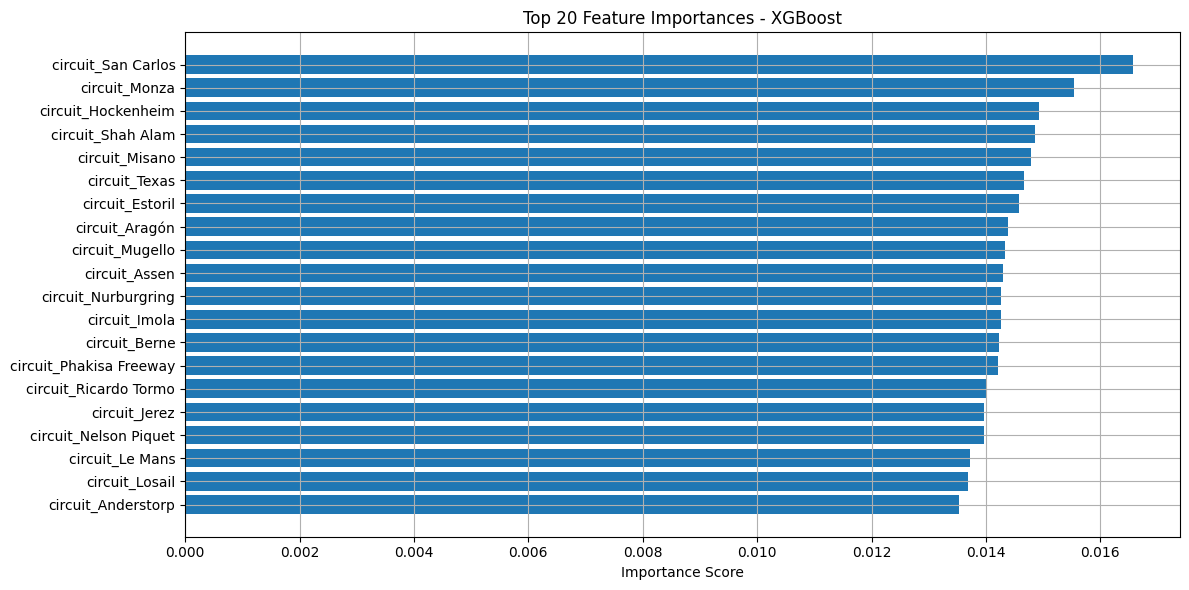

In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# STEP 1: Load preprocessed features
print("📥 Loading preprocessed features...")
X = pd.read_csv("processed_race_data.csv") 

# STEP 2: Load target from train.csv
print("🎯 Loading 'Lap_Time_Seconds' from train.csv...")
train_raw = pd.read_csv("train.csv")
y = train_raw['Lap_Time_Seconds'][:len(X)]

# STEP 3: One-hot encode 'circuit_name' if needed
if 'circuit_name' in X.columns:
    print("🔤 Encoding 'circuit_name'...")
    circuit_dummies = pd.get_dummies(X['circuit_name'], prefix='circuit', drop_first=True)
    X = X.drop(columns=['circuit_name'])
    X = pd.concat([X, circuit_dummies], axis=1)

# STEP 4: Train-validation split
print("🔄 Splitting into train/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train XGBoost without early stopping (legacy-safe)
print("🧠 Training XGBoost Regressor (no early stopping)...")
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# STEP 6: Predict and evaluate
print("📊 Evaluating XGBoost model...")
y_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n✅ XGBoost Evaluation (Legacy-Compatible):")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📏 MAE : {mae:.4f}")
print(f"🎯 R²  : {r2:.4f}")

# STEP 7: Feature importance plot
print("📊 Plotting top 20 feature importances...")
plt.figure(figsize=(12, 6))
importances = xgb_model.feature_importances_
top_idx = np.argsort(importances)[-20:]
plt.barh(np.array(X.columns)[top_idx], importances[top_idx])
plt.title("Top 20 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


📥 Loading preprocessed features...
🎯 Loading 'Lap_Time_Seconds' from train.csv...
🗑️ Dropping 'circuit_name' column...
🔄 Splitting into train/validation sets...
🧠 Training XGBoost with early stopping...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:11.51813	val-rmse:11.53254
[1]	train-rmse:11.50878	val-rmse:11.52348
[2]	train-rmse:11.49828	val-rmse:11.51316
[3]	train-rmse:11.48971	val-rmse:11.50484
[4]	train-rmse:11.48088	val-rmse:11.49616
[5]	train-rmse:11.47169	val-rmse:11.48718
[6]	train-rmse:11.46240	val-rmse:11.47817
[7]	train-rmse:11.45374	val-rmse:11.46968
[8]	train-rmse:11.44482	val-rmse:11.46099
[9]	train-rmse:11.43602	val-rmse:11.45239
[10]	train-rmse:11.42767	val-rmse:11.44426
[11]	train-rmse:11.41942	val-rmse:11.43620
[12]	train-rmse:11.41019	val-rmse:11.42705
[13]	train-rmse:11.40204	val-rmse:11.41914
[14]	train-rmse:11.39525	val-rmse:11.41246
[15]	train-rmse:11.38651	val-rmse:11.40395
[16]	train-rmse:11.37768	val-rmse:11.39536
[17]	train-rmse:11.37063	val-rmse:11.38852
[18]	train-rmse:11.36368	val-rmse:11.38188
[19]	train-rmse:11.35591	val-rmse:11.37427
[20]	train-rmse:11.34907	val-rmse:11.36765
[21]	train-rmse:11.34195	val-rmse:11.36066
[22]	train-rmse:11.33611	val-rmse:11.35488
[23]	train-rmse:11.32

C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📉 Final Validation RMSE: 0.2926
📊 Plotting top 20 feature importances...


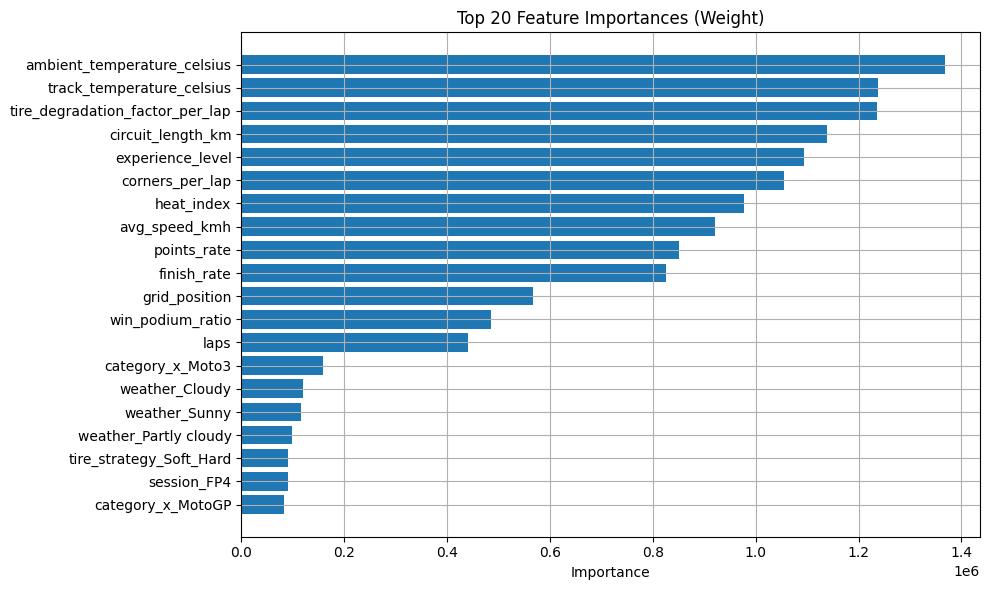

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load preprocessed features
print("📥 Loading preprocessed features...")
X = pd.read_csv("processed_race_data.csv")

# STEP 2: Load target
print("🎯 Loading 'Lap_Time_Seconds' from train.csv...")
train_raw = pd.read_csv("train.csv")
y = train_raw['Lap_Time_Seconds'][:len(X)]

# STEP 3: Drop 'circuit_name' if present
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' column...")
    X = X.drop(columns=['circuit_name'])

# STEP 4: Train-validation split
print("🔄 Splitting into train/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# STEP 6: Define parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.03,
    'max_depth': 9,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'tree_method': 'gpu_hist',  # or 'hist' for CPU
    'seed': 42
}

# STEP 7: Train with early stopping
print("🧠 Training XGBoost with early stopping...")
evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=30000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=True
)

# STEP 8: Predict & Evaluate
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"📉 Final Validation RMSE: {rmse:.4f}")

# STEP 9: Feature importance plot
print("📊 Plotting top 20 feature importances...")
importances = model.get_score(importance_type='weight')
sorted_feats = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(sorted_feats)], [f[1] for f in reversed(sorted_feats)])
plt.title("Top 20 Feature Importances (Weight)")
plt.xlabel("Importance")
plt.tight_layout()
plt.grid(True)
plt.show()


In [13]:
import joblib

# Save the model to a file
joblib.dump(model, 'xgboost_motogp_model.pkl')

print("✅ Model saved as 'xgboost_motogp_model.pkl'")


✅ Model saved as 'xgboost_motogp_model.pkl'


🧮 Extracting numeric features...
📎 Adding target column...
📊 Plotting heatmap...


C:\Users\cyber\AppData\Local\Temp\ipykernel_18656\1725023809.py:30: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


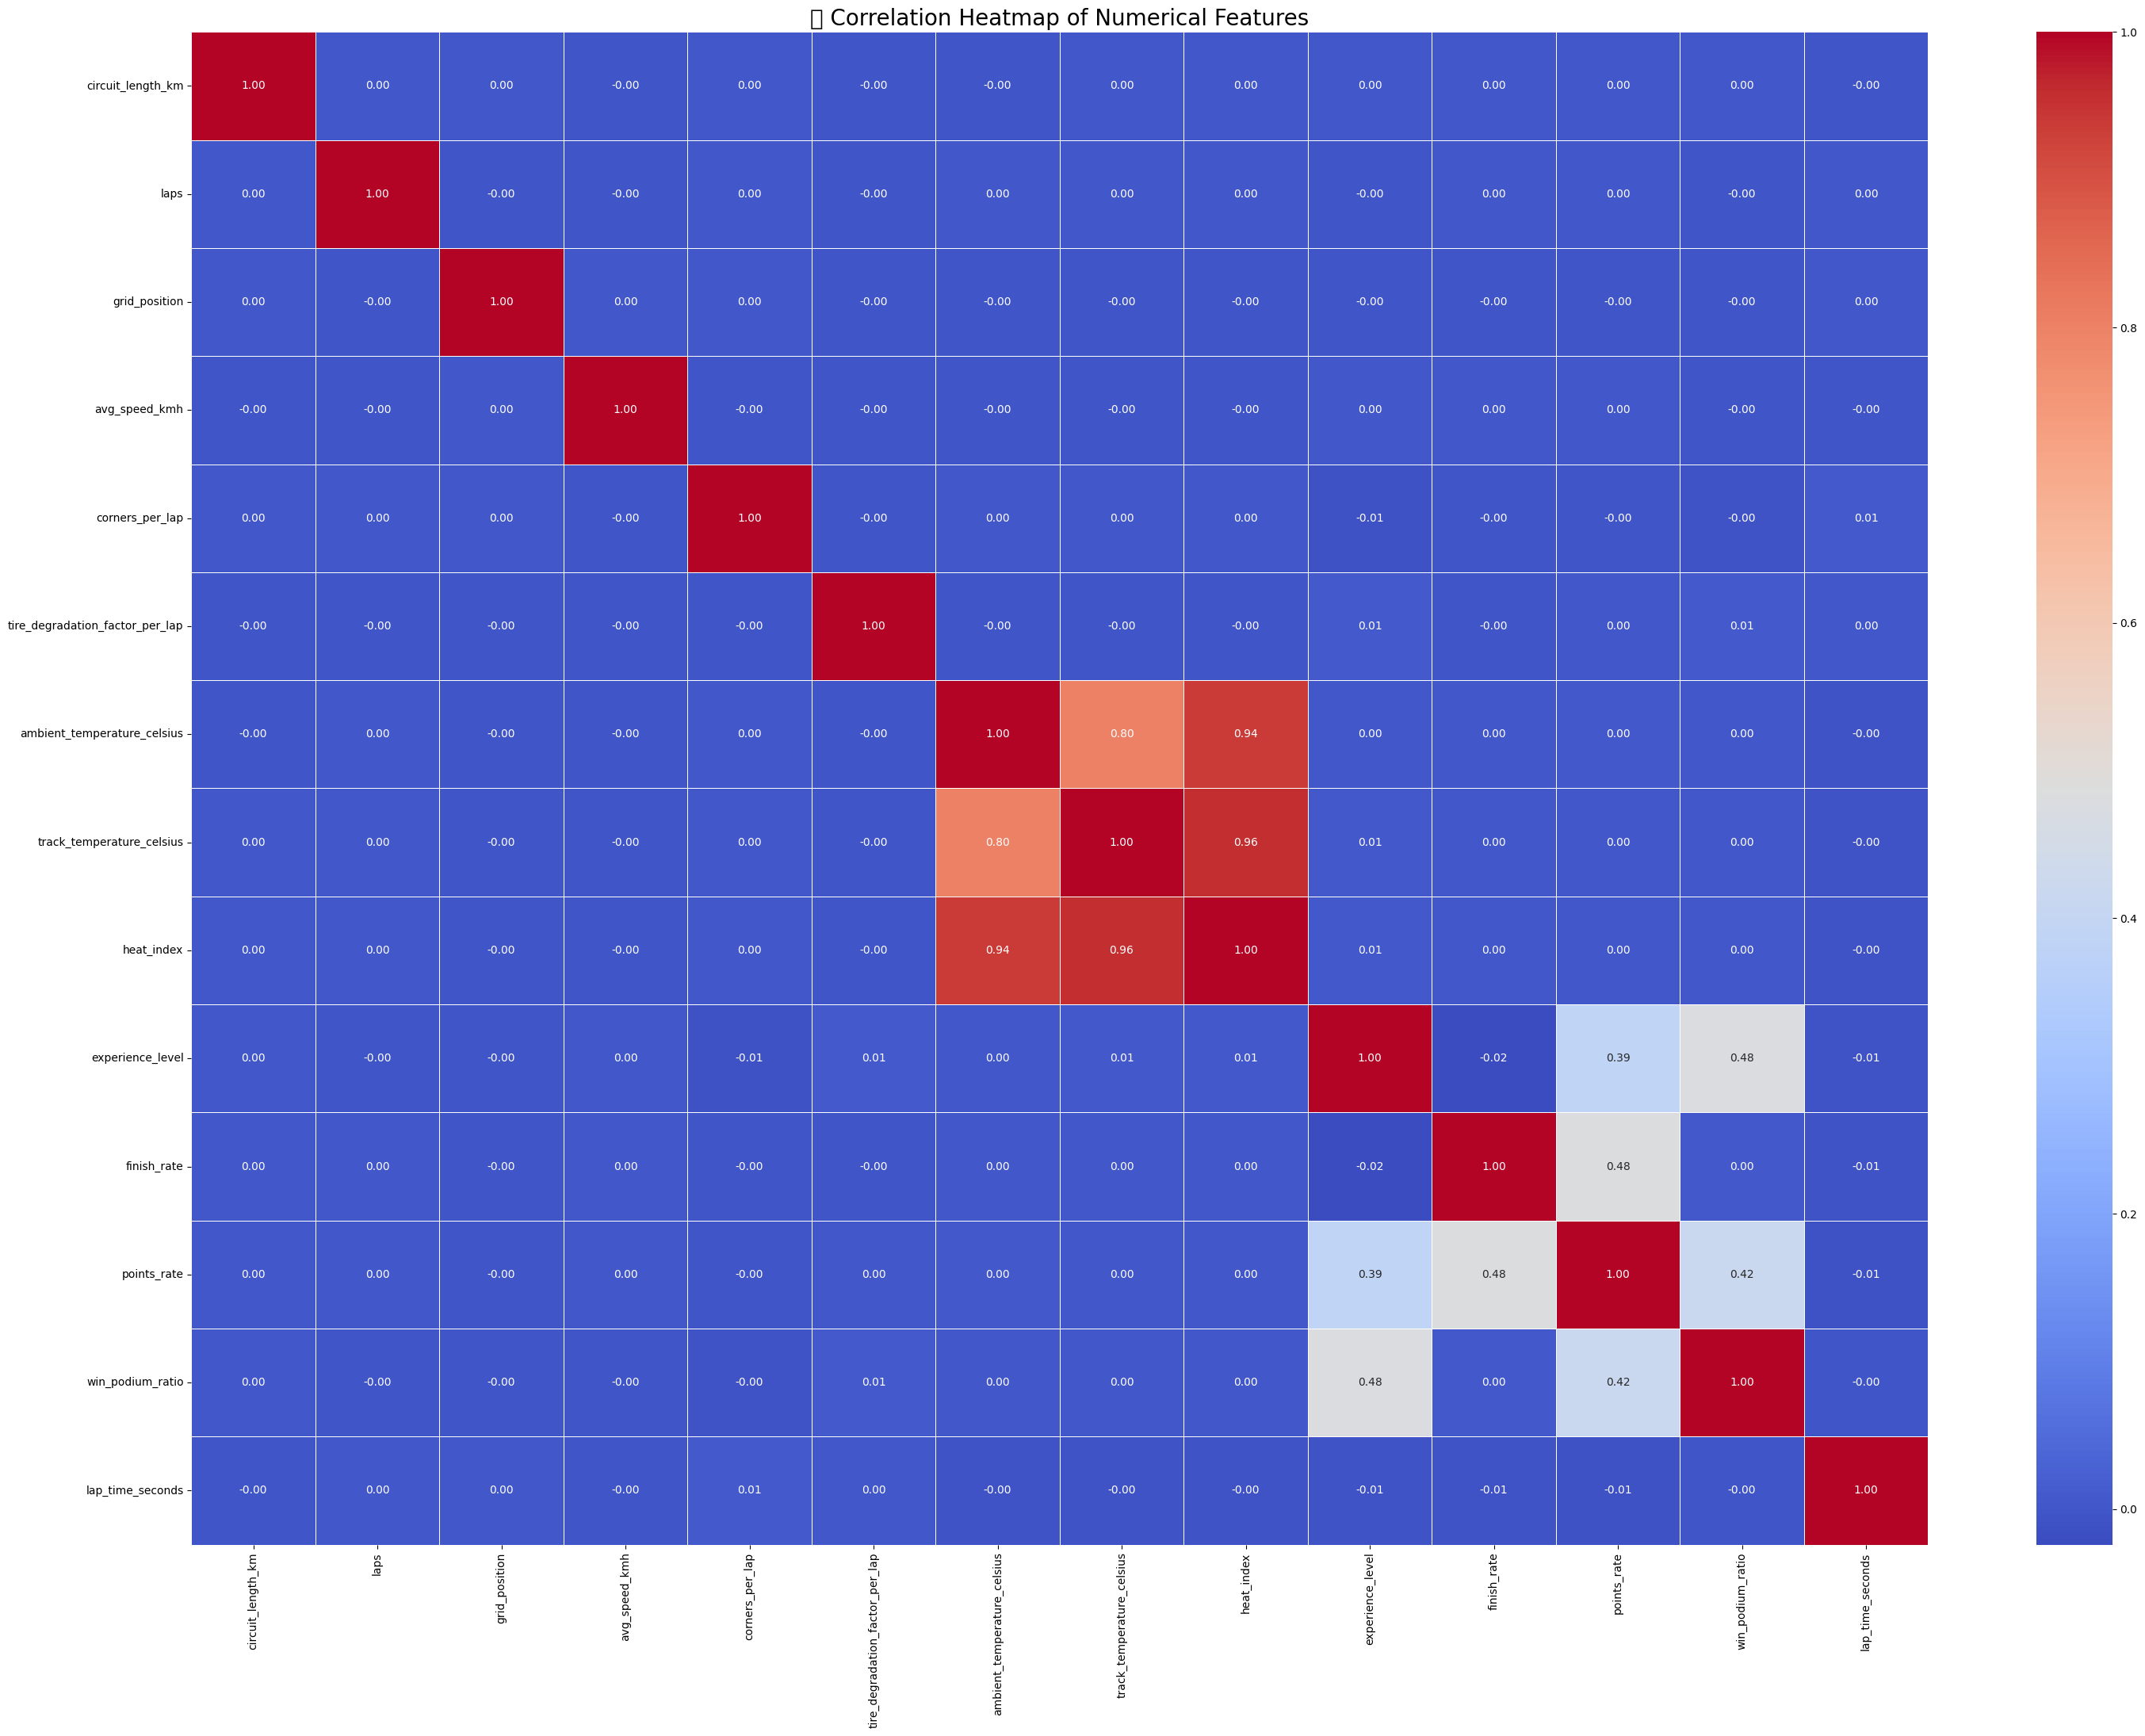

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Drop 'circuit_name' if it's still in the dataset
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' for correlation heatmap...")
    X = X.drop(columns=['circuit_name'])

# STEP 2: Extract only numeric columns
print("🧮 Extracting numeric features...")
numeric_df = X.select_dtypes(include=['int64', 'float64']).copy()

# STEP 3: Attach target column to correlation matrix
print("📎 Adding target column...")
numeric_df['lap_time_seconds'] = y.reset_index(drop=True)  # Ensure alignment

# STEP 4: Plot the heatmap
plt.figure(figsize=(30, 22))
print("📊 Plotting heatmap...")

sns.heatmap(
    numeric_df.corr(), 
    annot=True,
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title("🔍 Correlation Heatmap of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()


In [14]:
# Drop 'circuit_name' if it exists
if 'circuit_name' in X.columns:
    X = X.drop(columns=['circuit_name'])

# Print all column names
print("🧾 Column names in the dataset:\n")
for col in X.columns:
    print(col)


🧾 Column names in the dataset:

circuit_length_km
laps
grid_position
avg_speed_kmh
corners_per_lap
tire_degradation_factor_per_lap
ambient_temperature_celsius
track_temperature_celsius
heat_index
experience_level
finish_rate
points_rate
win_podium_ratio
category_x_Moto3
category_x_MotoGP
session_FP2
session_FP3
session_FP4
session_Qualifying
session_Race
session_Sprint
track_condition_Wet
weather_Cloudy
weather_Partly cloudy
weather_Raining
weather_Sunny
tire_strategy_Hard_Medium
tire_strategy_Hard_Soft
tire_strategy_Medium_Hard
tire_strategy_Medium_Medium
tire_strategy_Medium_Soft
tire_strategy_Soft_Hard
tire_strategy_Soft_Medium
tire_strategy_Soft_Soft
weather_impact_Low


In [15]:
X.columns

Index(['circuit_length_km', 'laps', 'grid_position', 'avg_speed_kmh',
       'corners_per_lap', 'tire_degradation_factor_per_lap',
       'ambient_temperature_celsius', 'track_temperature_celsius',
       'heat_index', 'experience_level', 'finish_rate', 'points_rate',
       'win_podium_ratio', 'category_x_Moto3', 'category_x_MotoGP',
       'session_FP2', 'session_FP3', 'session_FP4', 'session_Qualifying',
       'session_Race', 'session_Sprint', 'track_condition_Wet',
       'weather_Cloudy', 'weather_Partly cloudy', 'weather_Raining',
       'weather_Sunny', 'tire_strategy_Hard_Medium', 'tire_strategy_Hard_Soft',
       'tire_strategy_Medium_Hard', 'tire_strategy_Medium_Medium',
       'tire_strategy_Medium_Soft', 'tire_strategy_Soft_Hard',
       'tire_strategy_Soft_Medium', 'tire_strategy_Soft_Soft',
       'weather_impact_Low'],
      dtype='object')

In [2]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# STEP 1: Load validation dataset
val_df = pd.read_csv("ValDataF.csv")
print("✅ Loaded ValDataF.csv")

# STEP 2: Separate features and target
X_test = val_df.drop(columns=['lap_time_seconds'])
y_test = val_df['lap_time_seconds']

# STEP 3: Load the saved XGBoost Booster model
xgb_model = joblib.load("xgboost_motogp_model.pkl")
print("📦 Loaded saved XGBoost Booster model")

# ✅ STEP 4: Convert to DMatrix
dval = xgb.DMatrix(X_test)

# ✅ STEP 5: Predict using Booster
y_pred = xgb_model.predict(dval)

# STEP 6: Evaluate with RMSE
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on ValDataF: {rmse1:.4f}")


✅ Loaded ValDataF.csv
📦 Loaded saved XGBoost Booster model


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📉 RMSE on ValDataF: 0.2926


In [3]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# STEP 1: Load test dataset
test_features = pd.read_csv("Copy of Test_DATASET.csv")
print("✅ Loaded Copy of Test_DATASET.csv")

# STEP 2: Load Unique ID from test.csv
test_ids = pd.read_csv("test.csv")[['Unique ID']]
print("🆔 Loaded Unique IDs from test.csv")

# STEP 3: Load the saved XGBoost Booster model (trained using joblib)
xgb_model = joblib.load("xgboost_motogp_model.pkl")
print("📦 Loaded saved XGBoost Booster model from xgboost_motogp_model.pkl")

# STEP 4: Convert test features to DMatrix
dtest = xgb.DMatrix(test_features)

# STEP 5: Predict
y_pred = xgb_model.predict(dtest)
print("🔮 Prediction completed")

# STEP 6: Combine with Unique ID
solution = test_ids.copy()
solution['Lap_Time_Seconds'] = y_pred
print("🧷 Combined predictions with Unique IDs")

# STEP 7: Save as solution.csv
solution.to_csv("solution.csv", index=False)
print("✅ Saved predictions to solution.csv")


✅ Loaded Copy of Test_DATASET.csv
🆔 Loaded Unique IDs from test.csv
📦 Loaded saved XGBoost Booster model from xgboost_motogp_model.pkl


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:21:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


🔮 Prediction completed
🧷 Combined predictions with Unique IDs
✅ Saved predictions to solution.csv


In [9]:
import pandas as pd

# STEP 1: Load your processed features
X = pd.read_csv("processed_race_data.csv")
print(f"📥 Loaded X shape: {X.shape}")

# STEP 2: Load raw train.csv (where extra columns exist)
train_raw = pd.read_csv("train.csv")
print(f"📥 Loaded train.csv shape: {train_raw.shape}")

# STEP 3: Extract the additional columns
# Only select the first len(X) rows to align indexes
extra_columns = train_raw[['sequence', 'position', 'Championship_Points']].iloc[:len(X)].reset_index(drop=True)

# STEP 4: Add them to your existing X
X = X.reset_index(drop=True)
X = pd.concat([X, extra_columns], axis=1)

print(f"✅ Updated X shape: {X.shape}")
print("🧩 Columns added:", extra_columns.columns.tolist())


📥 Loaded X shape: (1914056, 36)
📥 Loaded train.csv shape: (1914056, 45)
✅ Updated X shape: (1914056, 39)
🧩 Columns added: ['sequence', 'position', 'Championship_Points']


📥 Loading preprocessed features...
🎯 Loading 'Lap_Time_Seconds' from train.csv...
🗑️ Dropping 'circuit_name' column...
🔄 Splitting into train/validation sets...
🧠 Training XGBoost with early stopping...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:22:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:11.51478	val-rmse:11.52930
[1]	train-rmse:11.50248	val-rmse:11.51739
[2]	train-rmse:11.48873	val-rmse:11.50398
[3]	train-rmse:11.47753	val-rmse:11.49310
[4]	train-rmse:11.46614	val-rmse:11.48190
[5]	train-rmse:11.45426	val-rmse:11.46995
[6]	train-rmse:11.44199	val-rmse:11.45804
[7]	train-rmse:11.43090	val-rmse:11.44734
[8]	train-rmse:11.41967	val-rmse:11.43675
[9]	train-rmse:11.40905	val-rmse:11.42642
[10]	train-rmse:11.39831	val-rmse:11.41594
[11]	train-rmse:11.38367	val-rmse:11.40169
[12]	train-rmse:11.37033	val-rmse:11.38865
[13]	train-rmse:11.35995	val-rmse:11.37848
[14]	train-rmse:11.34964	val-rmse:11.36840
[15]	train-rmse:11.33954	val-rmse:11.35860
[16]	train-rmse:11.32979	val-rmse:11.34923
[17]	train-rmse:11.31662	val-rmse:11.33631
[18]	train-rmse:11.30448	val-rmse:11.32441
[19]	train-rmse:11.29578	val-rmse:11.31576
[20]	train-rmse:11.28861	val-rmse:11.30879
[21]	train-rmse:11.27540	val-rmse:11.29595
[22]	train-rmse:11.26771	val-rmse:11.28824
[23]	train-rmse:11.25

C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📉 Final Validation RMSE: 6.4558
📊 Plotting top 20 feature importances...


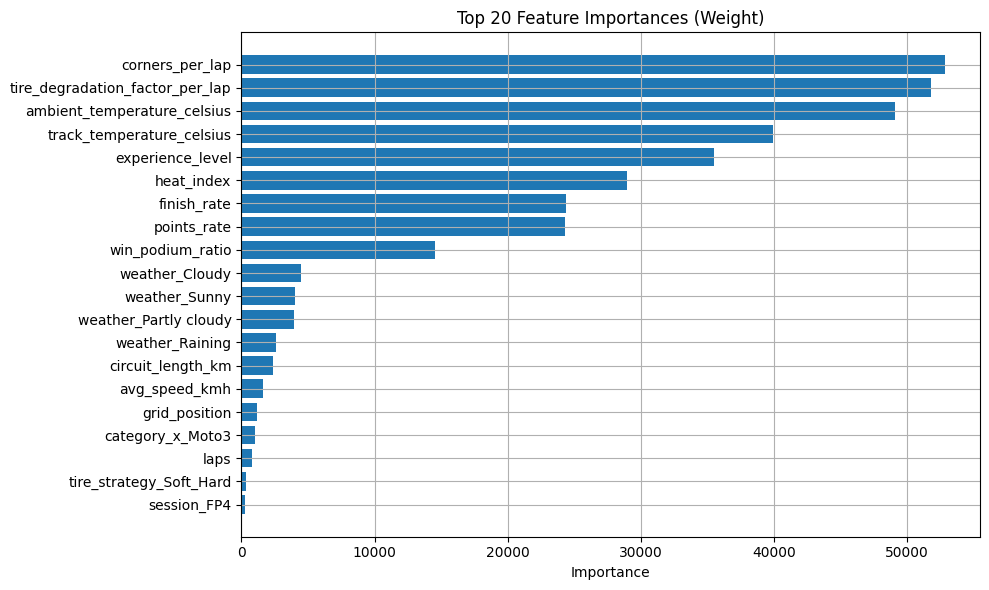

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load preprocessed features
print("📥 Loading preprocessed features...")
X = pd.read_csv("processed_race_data.csv")

# STEP 2: Load target
print("🎯 Loading 'Lap_Time_Seconds' from train.csv...")
train_raw = pd.read_csv("train.csv")
y = train_raw['Lap_Time_Seconds'][:len(X)]

# STEP 3: Drop 'circuit_name' if present
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' column...")
    X = X.drop(columns=['circuit_name'])

# STEP 4: Train-validation split
print("🔄 Splitting into train/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# STEP 6: Define parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.04,
    'max_depth': 9,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'tree_method': 'gpu_hist',  # or 'hist' for CPU
    'seed': 42
}

# STEP 7: Train with early stopping
print("🧠 Training XGBoost with early stopping...")
evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=True
)

# STEP 8: Predict & Evaluate
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"📉 Final Validation RMSE: {rmse:.4f}")

# STEP 9: Feature importance plot
print("📊 Plotting top 20 feature importances...")
importances = model.get_score(importance_type='weight')
sorted_feats = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(sorted_feats)], [f[1] for f in reversed(sorted_feats)])
plt.title("Top 20 Feature Importances (Weight)")
plt.xlabel("Importance")
plt.tight_layout()
plt.grid(True)
plt.show()


📥 Loading data with target included...
✅ Loaded dataset with shape: (1877301, 36)
✅ Final shape of features: (1877301, 35)
🔄 Splitting into train/validation sets...
🧠 Training XGBoost with early stopping...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:11.52299	val-rmse:11.53041
[100]	train-rmse:11.22331	val-rmse:11.23868
[200]	train-rmse:10.99078	val-rmse:11.01141
[300]	train-rmse:10.77503	val-rmse:10.80089
[400]	train-rmse:10.58244	val-rmse:10.61277
[500]	train-rmse:10.39876	val-rmse:10.43305
[600]	train-rmse:10.23179	val-rmse:10.27022
[700]	train-rmse:10.06343	val-rmse:10.10598
[800]	train-rmse:9.91630	val-rmse:9.96317
[900]	train-rmse:9.76288	val-rmse:9.81409
[1000]	train-rmse:9.61722	val-rmse:9.67270
[1100]	train-rmse:9.47635	val-rmse:9.53566
[1200]	train-rmse:9.32512	val-rmse:9.38800
[1300]	train-rmse:9.18227	val-rmse:9.24880
[1400]	train-rmse:9.05119	val-rmse:9.12132
[1500]	train-rmse:8.91424	val-rmse:8.98752
[1600]	train-rmse:8.77495	val-rmse:8.85172
[1700]	train-rmse:8.63798	val-rmse:8.71797
[1800]	train-rmse:8.50942	val-rmse:8.59206
[1900]	train-rmse:8.39237	val-rmse:8.47748
[2000]	train-rmse:8.27672	val-rmse:8.36432
[2100]	train-rmse:8.15867	val-rmse:8.24902
[2200]	train-rmse:8.04597	val-rmse:8.13913
[2300]	

C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📉 Final Validation RMSE: 0.2725
📊 Plotting top 20 feature importances...


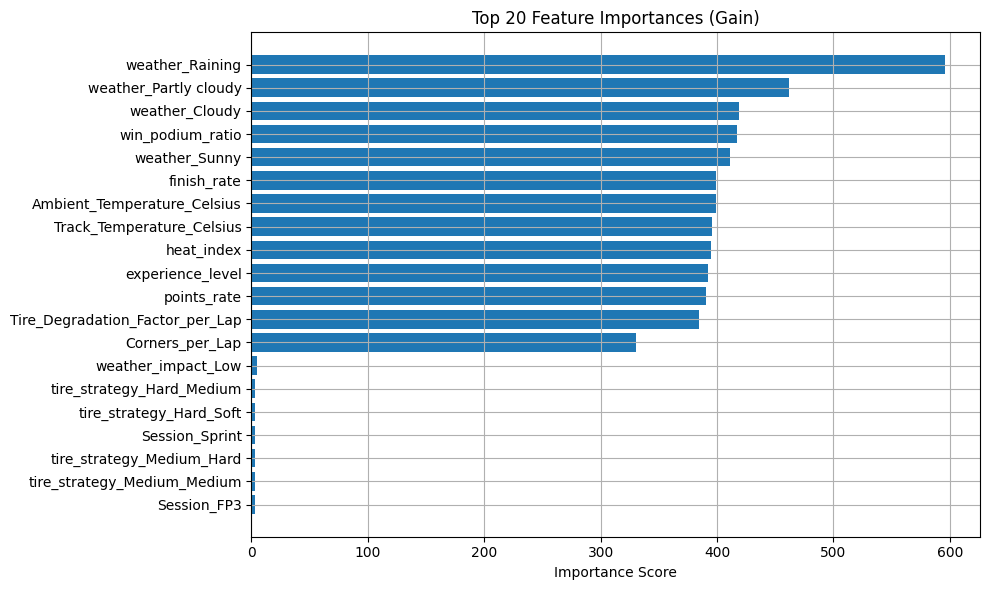

💾 Saving model...
✅ Model saved as best_xgb_model.json


In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# STEP 1: Load full dataset (features + target)
print("📥 Loading data with target included...")
df = pd.read_csv("TRAIN_df_filtered.csv")
print(f"✅ Loaded dataset with shape: {df.shape}")

# STEP 2: Separate target and features
y = df['lap_time_seconds']
X = df.drop(columns=['lap_time_seconds'])

# STEP 3: Drop 'circuit_name' if present
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' column...")
    X = X.drop(columns=['circuit_name'])

print(f"✅ Final shape of features: {X.shape}")

# STEP 4: Train-validation split
print("🔄 Splitting into train/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# STEP 6: Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 9,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'tree_method': 'gpu_hist',  # or 'hist' for CPU
    'seed': 42
}

# STEP 7: Train with early stopping
print("🧠 Training XGBoost with early stopping...")
evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=70000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)

# STEP 8: Predict and evaluate
print("📏 Evaluating model performance...")
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"📉 Final Validation RMSE: {rmse:.4f}")

# STEP 9: Plot top 20 feature importances
print("📊 Plotting top 20 feature importances...")
importances = model.get_score(importance_type='gain')
sorted_feats = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(sorted_feats)], [f[1] for f in reversed(sorted_feats)])
plt.title("Top 20 Feature Importances (Gain)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 10: Save model
print("💾 Saving model...")
model.save_model("best_xgb_model.json")
print("✅ Model saved as best_xgb_model.json")


In [1]:
import joblib

# Save the model to a file
joblib.dump(model, 'xgboostout_motogp_model.pkl')

print("✅ Model saved as 'xgboostout_motogp_model.pkl'")

NameError: name 'model' is not defined

In [19]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# STEP 1: Load validation dataset
val_df = pd.read_csv("ValDataF.csv")
print("✅ Loaded ValDataF.csv")

# STEP 2: Separate features and target
X_test = val_df.drop(columns=['lap_time_seconds'])
y_test = val_df['lap_time_seconds']

# STEP 3: Load the saved XGBoost Booster model
xgb_mode = joblib.load("xgboostout_motogp_model.pkl")
print("📦 Loaded saved XGBoost Booster model")

# ✅ STEP 4: Convert to DMatrix
dval = xgb.DMatrix(X_test)

# ✅ STEP 5: Predict using Booster
y_pred = xgb_mode.predict(dval)

# STEP 6: Evaluate with RMSE
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on ValDataF: {rmse:.4f}")


✅ Loaded ValDataF.csv
📦 Loaded saved XGBoost Booster model


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📉 RMSE on ValDataF: 1.0156


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# STEP 1: Load validation dataset
val_df = pd.read_csv("ValDataF.csv")
print("✅ Loaded ValDataF.csv")

# STEP 2: Separate features and target
X_test = val_df.drop(columns=['lap_time_seconds'])
y_test = val_df['lap_time_seconds']

# STEP 3: Load the XGBoost Booster model from JSON
xgb_model = xgb.Booster()
xgb_model.load_model("best_xgb_model.json")
print("📦 Loaded XGBoost model from best_xgb_model.json")

# STEP 4: Convert features to DMatrix
dval = xgb.DMatrix(X_test)

# STEP 5: Predict
y_pred = xgb_model.predict(dval)

# STEP 6: Evaluate with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on ValDataF: {rmse:.4f}")


✅ Loaded ValDataF.csv


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load full dataset (with X and y combined)
print("📥 Loading Train_withoutoutliers.csv with target inside...")
df = pd.read_csv("Train_withoutoutliers.csv")

# STEP 2: Separate features and target
X = df.drop(columns=['lap_time_seconds'])
y = df['lap_time_seconds']

# STEP 3: Drop 'circuit_name' if present
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' column...")
    X = X.drop(columns=['circuit_name'])

# STEP 4: Convert full data to DMatrix
dtrain = xgb.DMatrix(X, label=y)

# STEP 5: Define overfitting-friendly parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,           # Higher learning rate
    'max_depth': 15,                # Very deep trees
    'subsample': 1.0,               # Use all rows
    'colsample_bytree': 1.0,        # Use all features
    'tree_method': 'gpu_hist',      # Fast training if GPU available
    'seed': 42
}

# STEP 6: Train (no early stopping, full fit)
print("🧠 Training to overfit entire dataset...")
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,           # Large number of trees
    verbose_eval=100
)

# STEP 7: Predict on same data (overfitting check)
y_pred = model.predict(dtrain)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"📉 Overfitted RMSE on training set: {rmse:.4f}")

# STEP 8: Plot feature importance
print("📊 Plotting top 20 feature importances...")
importances = model.get_score(importance_type='weight')
sorted_feats = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(sorted_feats)], [f[1] for f in reversed(sorted_feats)])
plt.title("Top 20 Feature Importances (Weight)")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


📥 Loading Train_withoutoutliers.csv with target inside...
🧠 Training to overfit entire dataset...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


📥 Loading Train_withoutoutliers.csv with target inside...
🧠 Training to overfit entire dataset...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:11.36615
[1]	train-rmse:11.21535
[2]	train-rmse:11.08970
[3]	train-rmse:10.92822
[4]	train-rmse:10.78171
[5]	train-rmse:10.66084
[6]	train-rmse:10.58563
[7]	train-rmse:10.45247
[8]	train-rmse:10.33322
[9]	train-rmse:10.21041
[10]	train-rmse:10.10005
[11]	train-rmse:9.98605
[12]	train-rmse:9.90474
[13]	train-rmse:9.78994
[14]	train-rmse:9.69849
[15]	train-rmse:9.60929
[16]	train-rmse:9.50297
[17]	train-rmse:9.44017
[18]	train-rmse:9.39537
[19]	train-rmse:9.34438
[20]	train-rmse:9.24231
[21]	train-rmse:9.20537
[22]	train-rmse:9.17818
[23]	train-rmse:9.11384
[24]	train-rmse:9.07884
[25]	train-rmse:8.98457
[26]	train-rmse:8.89618
[27]	train-rmse:8.86381
[28]	train-rmse:8.81906
[29]	train-rmse:8.77480
[30]	train-rmse:8.69378
[31]	train-rmse:8.64152
[32]	train-rmse:8.58732
[33]	train-rmse:8.52357
[34]	train-rmse:8.50585
[35]	train-rmse:8.44229
[36]	train-rmse:8.42067
[37]	train-rmse:8.37906
[38]	train-rmse:8.35144
[39]	train-rmse:8.33722
[40]	train-rmse:8.30286
[41]	train-rmse

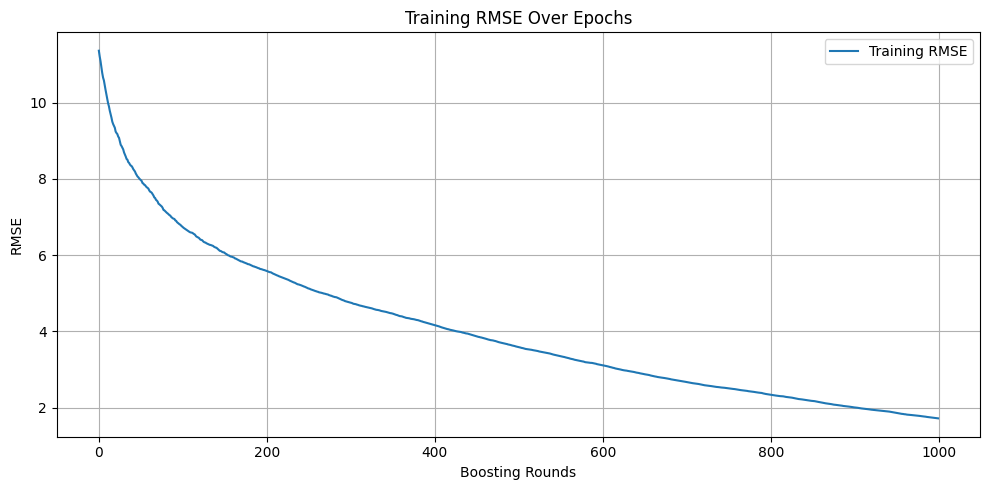

📊 Plotting top 20 feature importances...


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


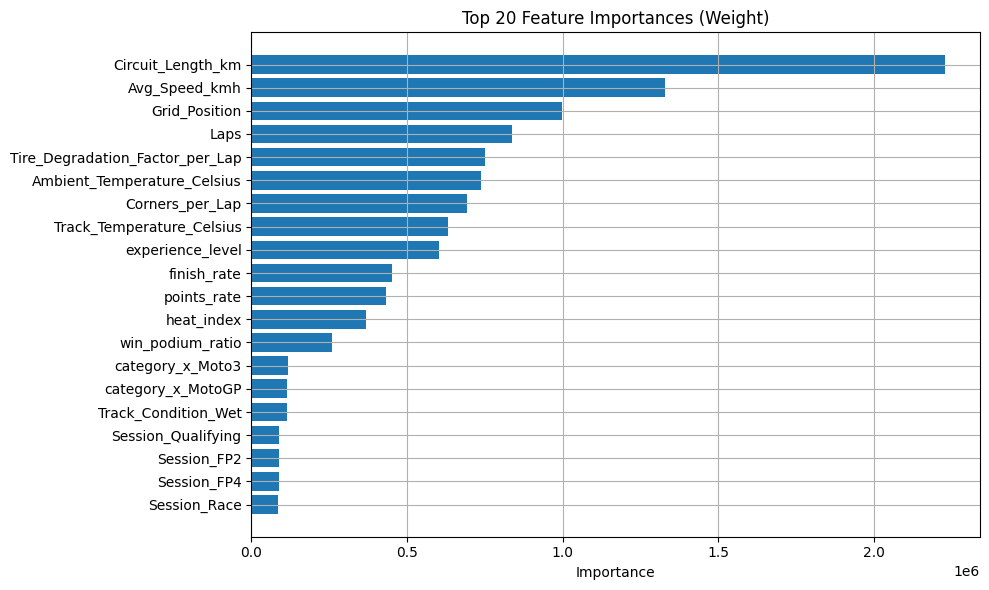

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load full dataset (with X and y combined)
print("📥 Loading Train_withoutoutliers.csv with target inside...")
df = pd.read_csv("Train_withoutoutliers.csv")

# STEP 2: Separate features and target
X = df.drop(columns=['lap_time_seconds'])
y = df['lap_time_seconds']

# STEP 3: Drop 'circuit_name' if present
if 'circuit_name' in X.columns:
    print("🗑️ Dropping 'circuit_name' column...")
    X = X.drop(columns=['circuit_name'])

# STEP 4: Convert full data to DMatrix
dtrain = xgb.DMatrix(X, label=y)

# STEP 5: Define parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 15,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'tree_method': 'gpu_hist',
    'seed': 42
}

# Custom list to store RMSE values
results = {}

# STEP 6: Train with logging every epoch
print("🧠 Training dataset...")
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train")],
    evals_result=results,
    verbose_eval=1  # change to 100 for every 100 steps
)

# STEP 7: Final training RMSE
final_rmse = results['train']['rmse'][-1]
print(f"📉 Final Training RMSE: {final_rmse:.4f}")

# STEP 8: Plot RMSE over epochs
plt.figure(figsize=(10, 5))
plt.plot(results['train']['rmse'], label='Training RMSE')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training RMSE Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 9: Feature importance plot
print("📊 Plotting top 20 feature importances...")
importances = model.get_score(importance_type='weight')
sorted_feats = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(sorted_feats)], [f[1] for f in reversed(sorted_feats)])
plt.title("Top 20 Feature Importances (Weight)")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import joblib

# Save the model to a file
joblib.dump(model, 'xgboostwo_motogp_model.pkl')

print("✅ Model saved as 'xgboost_motogp_model.pkl'")

✅ Model saved as 'xgboost_motogp_model.pkl'


In [4]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# STEP 1: Load test dataset
test_features = pd.read_csv("Copy of Test_DATASET.csv")
print("✅ Loaded Copy of Test_DATASET.csv")

# STEP 2: Load Unique ID from test.csv
test_ids = pd.read_csv("test.csv")[['Unique ID']]
print("🆔 Loaded Unique IDs from test.csv")

# STEP 3: Load the saved XGBoost Booster model (trained using joblib)
xgb_model = joblib.load("xgboostwo_motogp_model.pkl")
print("📦 Loaded saved XGBoost Booster model from xgboost_motogp_model.pkl")

# STEP 4: Convert test features to DMatrix
dtest = xgb.DMatrix(test_features)

# STEP 5: Predict
y_pred = xgb_model.predict(dtest)
print("🔮 Prediction completed")

# STEP 6: Combine with Unique ID
solution = test_ids.copy()
solution['Lap_Time_Seconds'] = y_pred
print("🧷 Combined predictions with Unique IDs")

# STEP 7: Save as solution.csv
solution.to_csv("solution2.csv", index=False)
print("✅ Saved predictions to solution.csv")


✅ Loaded Copy of Test_DATASET.csv
🆔 Loaded Unique IDs from test.csv
📦 Loaded saved XGBoost Booster model from xgboost_motogp_model.pkl


C:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:25:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


🔮 Prediction completed
🧷 Combined predictions with Unique IDs
✅ Saved predictions to solution.csv
